#**Project Name: Fake News Detection and Evaluation with Confusion Matrix**
####**created by: Suprava Das**

# **Problem Statement:**


This project addresses the challenge of distinguishing fake news from true news using machine learning techniques. A classification model is trained on textual data, and its effectiveness is evaluated through a confusion matrix to assess accuracy and misclassification patterns.

# **Data Introduction:**

This dataset was compiled from real-world sources; the genuine articles were scraped from Reuters.com (a reputable news website). In contrast, the fake news articles were gathered from various unreliable platforms identified by Politifact (a U.S.-based fact-checking organization) and Wikipedia. The collection covers articles on diverse subjects, though most of them center around politics and world news.

The dataset cab also be downloaded from kaggle using the link: www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets

# **Import Packages**

Imported all required libraries and installed any missing packages in

1.   List item
2.   List item

Google Colab.

In [1]:
# installed missing package gensim
!pip install gensim

In [2]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Preprocessing**

In [3]:
# read the csv file using pandas dataframe
fake_file_path = '/content/drive/MyDrive/fake - fake.csv'
true_file_path = '/content/drive/MyDrive/true - true.csv'
fake_news_data = pd.read_csv(fake_file_path)
true_news_data = pd.read_csv(true_file_path)

**Q1.** View the imported csv file data using Pandas Dataframe.

In [4]:
# Display the first 5 rows of the fake news dataframe
print("Fake News Data:")
fake_news_data.head()

# Display the first 5 rows of the true news dataframe
print("\nTrue News Data:")
true_news_data.head()

Fake News Data:

True News Data:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

In [6]:
# merged true and fake news datasets
merged_data = [fake_news_data,true_news_data]
df = pd.concat(merged_data,axis=0)

**Q2.** drop rows from the dataset consisting null values.

In [7]:
# drop rows from the dataset consisting null values.
df = df.dropna()

**Q3.** shuffle the data.

In [8]:
# Shuffle the data to mix the true and fake news rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
#reset index of the merged dataframe
df = df.reset_index(drop=True)

In [10]:
# view top 10 rows of processed dataset
df.head(10)

,title,text,subject,date,class
0,Protesters gather in Kiev after police recaptu...,KIEV (Reuters) - Ukrainian police recaptured t...,worldnews,"December 8, 2017",0
1,Papuan separatists to petition U.N. against In...,GENEVA (Reuters) - The people of West Papua ar...,worldnews,"September 6, 2017",0
2,Local Citizens To Bundy Terrorists: ‘Get The H...,Harney County resident Jarvis Kennedy has a me...,News,"January 7, 2016",1
3,Tunisian labor union says Jerusalem decision a...,TUNIS (Reuters) - Tunisia s powerful labor uni...,worldnews,"December 6, 2017",0
4,Montana congressman-elect sentenced to communi...,"BOZEMAN, Mont. (Reuters) - A Montana Republica...",politicsNews,"June 12, 2017",0
5,Russia's RT America registers as 'foreign agen...,MOSCOW/WASHINGTON (Reuters) - The Kremlin-back...,worldnews,"November 13, 2017",0
6,MUSLIMS SILENT AFTER TERROR ATTACKS…BUT BLAME ...,"Whenever we have a terror attack in America, t...",politics,"Aug 14, 2016",1
7,Turkey says hopes U.S. will lift decision on v...,ANKARA (Reuters) - Turkey hopes the United Sta...,worldnews,"October 11, 2017",0
8,Obama Just Made A VERY Powerful Statement Abou...,President Barack Obama appeared today at the B...,News,"September 20, 2017",1
9,WHOA! ROCK LEGEND Roger Daltrey Rips EU For “R...,WHO knew legendary rocker Roger Daltrey was su...,Government News,"May 10, 2016",1


**Q4.** view the text content of a random data point.

In [11]:
# Select one random row from the DataFrame
random_datapoint = df.sample(n=1, random_state=101)
#Extract the text and the class label from that row.
text_content = random_datapoint['text'].iloc[0]
class_label = random_datapoint['class'].iloc[0]


**Data Visualization**

Text(0, 0.5, 'Number of News')

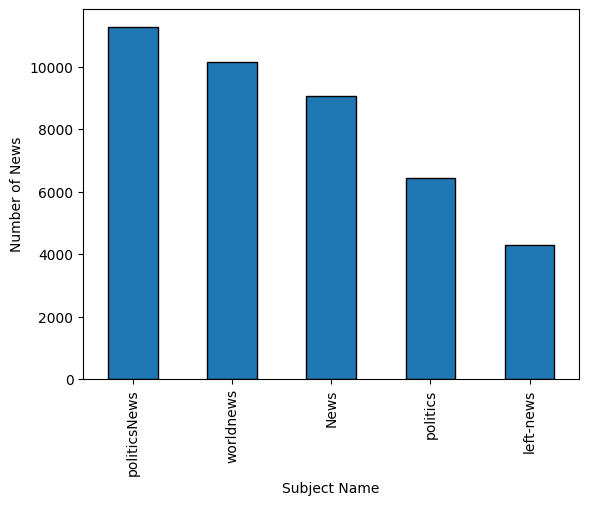

In [12]:
#create a data visualzation of bar/column/line chart of top 5 subjects ->
top_5_subjects = (df['subject'].value_counts()).nlargest(5)
top_5_subjects.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subject Name')
plt.ylabel('Number of News')

**Q5.** Create a pie chart to find the pecentage of news on differenet subject.

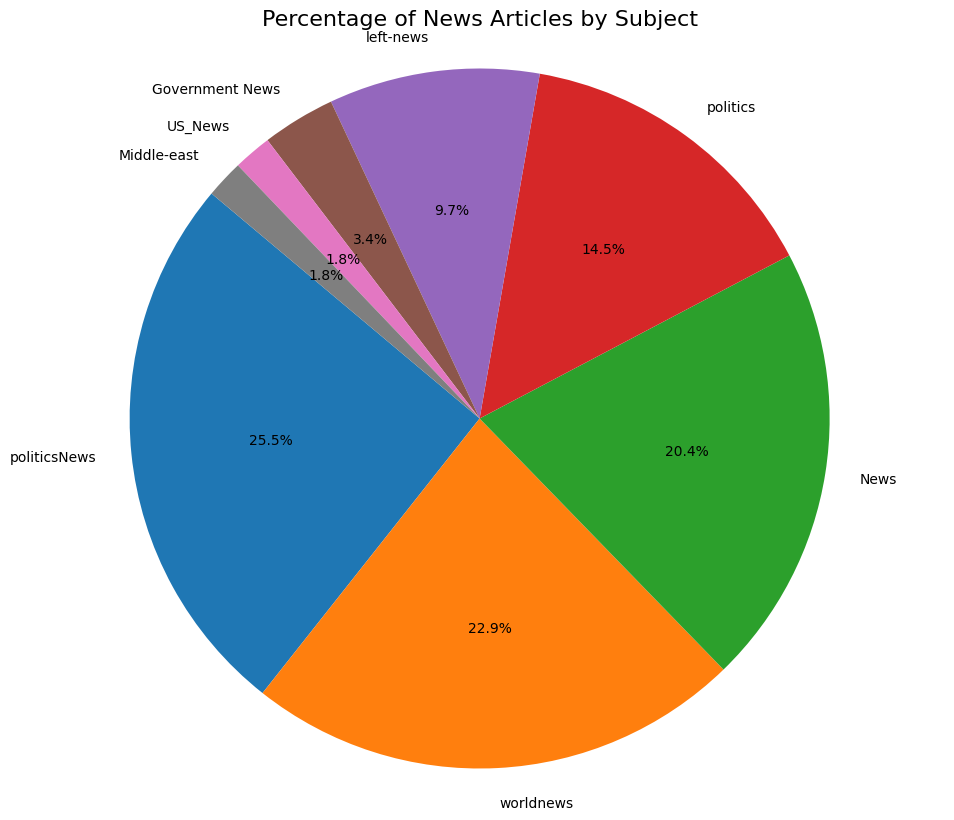

In [13]:
#First, calculate the number of news articles for each subject
subject_counts = df['subject'].value_counts()
# Set the figure size for better readability
plt.figure(figsize=(12, 10))
# Create the pie chart
subject_counts.plot(kind='pie',autopct='%1.1f%%',startangle=140)
# Add a title to the chart
plt.title('Percentage of News Articles by Subject', fontsize=16)

# Remove the default 'subject' label on the side, as it's not needed for a pie chart
plt.ylabel('')

# Ensure the pie chart is a perfect circle
plt.axis('equal')

# Display the chart
plt.show()


**Text Processing**

In [14]:
# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\S+|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

In [15]:
# drop unnecessary columns for classification purpose
df1= df.drop(['title','subject','date'],axis=1)

In [16]:
# apply wordopt method to the whole dataset and view the text content of a random data point
df1['text']=df1['text'].apply(wordopt)
df1['text'][100]

'john oliver had a field day mocking donald trump on sunday night for repeatedly shooting himself in the foot and it was an absolute laugh riot the hbo host of last week tonight began by talking about how hillary clinton released her tax returns and has had to answer questions about clinton foundation connections to the state department which could have helped the republican nominee if he hadn t utterly screwed himself and his own campaign by running his mouth she was eclipsed by the imploding star that is donald trump the owner of what you might describe as a resting rich face oliver said you see trump tried to briefly act sane by reading his speech material off of a teleprompter which the right wing hypocritically whines about president obama doing so he can t go off script and say stupid things this was the 53rd consecutive week he was going to put his campaign back on track oliver quipped but no sooner had trump started doing that when he started calling for second amendment people

# **Building Model**

In [17]:
# Separate independent and target columns from the dataset and stored them in x & y variables
x= df1['text']
y= df1['class']

**Q6.** Split the dataset into training and testing sets with 25% test size and store them in x_train, x_test, y_train, and y_test.

In [18]:
from sklearn.model_selection import train_test_split

# The 'x' and 'y' variables are assumed to have been created
# from the previous data preparation steps.
# Splitting the dataset with a 25% test size and a random state for reproducibility.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Printing the shapes of the resulting sets to verify the split
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (33198,)
Shape of x_test: (11067,)
Shape of y_train: (33198,)
Shape of y_test: (11067,)


## **Word Embedding ( Word2Vec )**

In [19]:
# import bbc_news data using url link in json format for training Word2Vec word embedding model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content']
print("Size of Word Dictonary for training Word2Vec: ",news_seg.shape[0])
news_seg.head(2)

Size of Word Dictonary for training Word2Vec:  15825


,content
0,The heroin substitute methadone can be used as...
1,The eldest son of North Korean leader Kim Jong...


In [20]:
# apply wordopt function for text processing
news_seg=news_seg.apply(wordopt)
sentences = [sentence.split() for sentence in news_seg ]
w2v_model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [21]:
# function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [22]:
# convert train and test dataset into vector form
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])

##**Logistic Regression**

In [23]:
# Trains a Logistic Regression model using vector formed trained data ->
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(xv_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
# detect the class(fake or true) on test data and evaluates its accuracy on test set
y_pred = logistic_model.predict(xv_test)
print("Prediction on test data: ",y_pred)
print("Accuracy Score on Test Data: ",logistic_model.score(xv_test,y_test))

Prediction on test data:  [1 0 0 ... 1 1 1]
Accuracy Score on Test Data:  0.933495979036776


####**Accuracy Checking**

In [25]:
# Check Precision, Recall, F1 Score of the logistic model ->
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.933495979036776
Precision: 0.9451734675534783
Recall: 0.9242397609421691
F1 score: 0.934589406327764


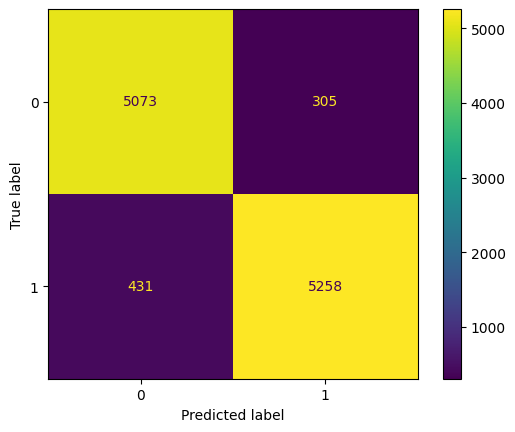

In [26]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

##**Random Forest Classifier**

####**Model Building and Prediction**

**Q7.** Use Random Forest Classifer for this classfication purpose and predict the outcomes for test data.

In [27]:
# ADDITION: The required package for the Random Forest model
from sklearn.ensemble import RandomForestClassifier
# We set random_state=42 to ensure the results are reproducible.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#  Train the model on your vectorized training data
print("Training the Random Forest model...")
rf_model.fit(xv_train, y_train)
print("Training complete.")

#  Predict the outcomes for the vectorized test data
print("\nPredicting outcomes for the test data...")
rf_y_pred = rf_model.predict(xv_test)

#  Display the array of predictions
# (1 = Fake News, 0 = True News)
print("Predictions:", rf_y_pred)

Training the Random Forest model...
Training complete.

Predicting outcomes for the test data...
Predictions: [1 0 0 ... 1 1 1]


####**Accuracy Checking**

**Q8.** Find the accuracy, precison, recall, F1 Score of the model while using Random Forest Classsifier and visualize overall accuracy using confusion matrix.


--- Model Evaluation Metrics ---
Accuracy: 0.9360
Precision: 0.9399
Recall: 0.9353
F1 Score: 0.9376

--- Classification Report ---
              precision    recall  f1-score   support

   True News       0.93      0.94      0.93      5378
   Fake News       0.94      0.94      0.94      5689

    accuracy                           0.94     11067
   macro avg       0.94      0.94      0.94     11067
weighted avg       0.94      0.94      0.94     11067


--- Visualizing Confusion Matrix ---


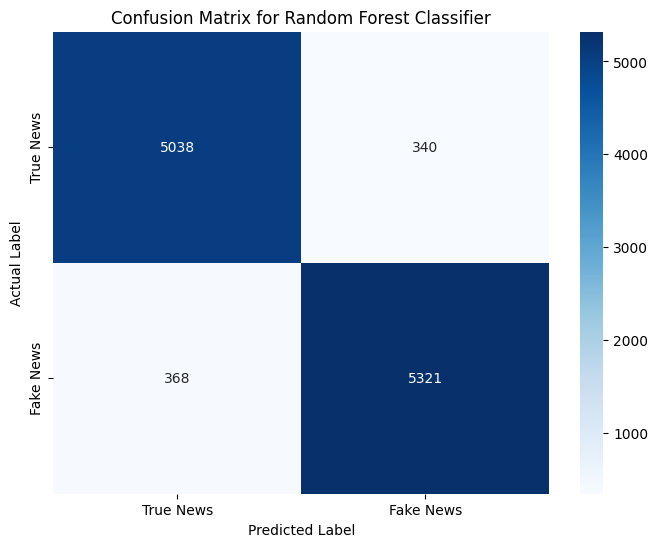

In [32]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# We will evaluate using the true test labels (y_test) and the predictions you already made (rf_y_pred)

print("\n--- Model Evaluation Metrics ---")
accuracy = accuracy_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred)
recall = recall_score(y_test, rf_y_pred)
f1 = f1_score(y_test, rf_y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Display the classification report for a detailed breakdown
print("\n--- Classification Report ---")
class_names = ['True News', 'Fake News']
print(classification_report(y_test, rf_y_pred, target_names=class_names))


# Visualize the Confusion Matrix
print("\n--- Visualizing Confusion Matrix ---")
cm = confusion_matrix(y_test, rf_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#**Save the Model using pickle**

In [38]:
# save the logistic regression model as pickle file
import pickle
filename1 = '/content/drive/My Drive/IDEAS-TIH/Internship_2025/word2vec_logistic_model.pickle'
pickle.dump(logistic_model, open(filename1, 'wb')) #word2vec model

In [34]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))

# --- DEBUGGING STEP ---
# Check the shapes/lengths of your test data before scoring
print("Shape of xv_test:", xv_test.shape)
print("Shape of y_test:", y_test.shape)
# ----------------------

result = loaded_model.score(xv_test, y_test)
print(result)

Shape of xv_test: (11067, 100)
Shape of y_test: (11067,)
0.933495979036776


**Q9.** Save the trained Random Forest Model as pickle/svg file in your desired repository for further use.

In [35]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.933495979036776


**Q10.** Load that saved model in another Notebook use it on other dataset for fake news detection.

In [37]:
# NOW, ALSO SAVE THE WORD2VEC MODEL
w2v_filename = '/content/drive/My Drive/word2vec_model.model'
w2v_model.save(w2v_filename)

print("Both models have been saved successfully!")

Both models have been saved successfully!


**Q11(Optional).**


1.  Try to enhance the model's accuracy by using adaboost or any other boosting methods.
2.  Use TF-IDF or any other vectorizer instead of Word2Vec and study how much it affects on model's accuracy.




